<a href="https://colab.research.google.com/github/0bsidian03/CompPhysHW/blob/main/Hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


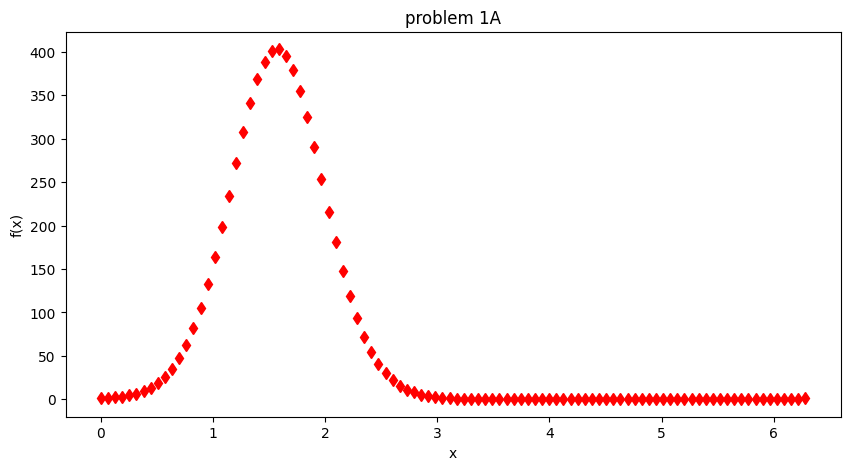

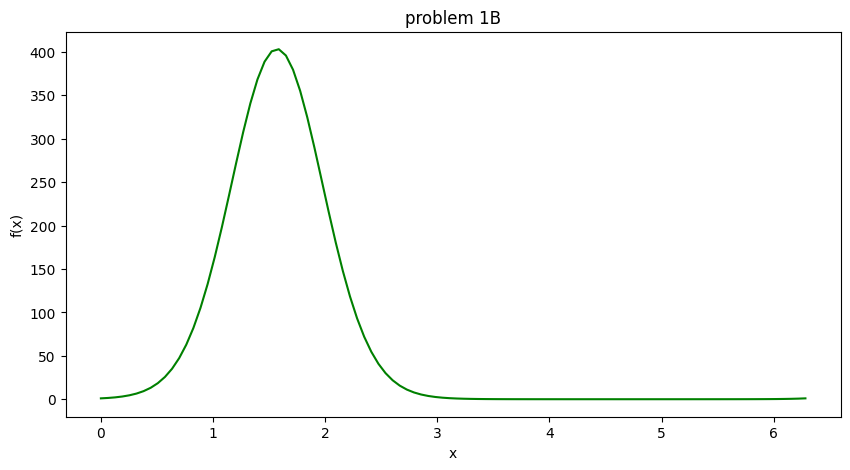

In [ ]:
#question1
x = np.linspace(0, 2 * np.pi, 100)
fx = np.exp(6 * np.sin(x))
plt.figure(figsize=(10, 5))
plt.plot(x, fx, 'rd', linestyle='None')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('problem 1A')
plt.show()
plt.figure(figsize=(10, 5))
plt.plot(x, fx, 'g-')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('problem 1B')
plt.show()

In [ ]:
import io
import numpy as np # Ensure numpy is imported

# After uploading 'Dataset_B.csv' to your Colab environment, it will typically be in the /content/ directory.
# You can also drag and drop files directly into the file browser (folder icon on the left).
path2data = '/content'

# Corrected file name: changed .data to .dat
file_path = path2data + '/NoisyFunction.dat'

try:
    # Open the file with 'utf-8-sig' encoding to automatically handle the Byte Order Mark (BOM).
    # The BOM (e.g., '\ufefft') is a special character that indicates the encoding of a UTF-8 file,
    # but numpy.loadtxt tries to interpret it as part of a number, causing a ValueError.
    with open(file_path, 'r', encoding='utf-8-sig') as f:
        file_content = f.read()

    # Use io.StringIO to treat the string content as a file-like object, which numpy.loadtxt can then process.
    # Change delimiter to None to handle whitespace-separated values.
    data = np.loadtxt(io.StringIO(file_content), delimiter=None, skiprows=0) # Removed skiprows=1 as there's no explicit header here. If the first row is a header, adjust.

except ValueError as e:
    # If the error persists or a new ValueError occurs, it might be due to other non-numeric data
    # in the file (e.g., headers, empty strings, or actual text).
    # You might need to inspect the CSV content or consider using pandas.read_csv for more robust parsing.
    print(f"Error loading data even after handling BOM: {e}")
    raise
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please ensure it's uploaded to /content.")
    raise

In [ ]:
print('shape of data',np.shape(data))

t = data[:, 0]
ft = data[:, 1]


shape of data (1025, 2)


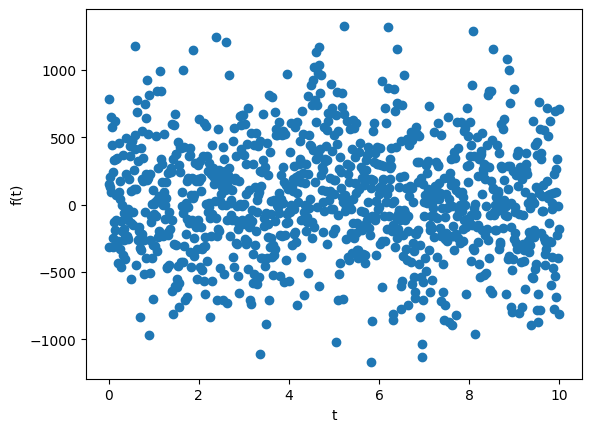

In [ ]:
#q2
plt.scatter(t, ft)
plt.xlabel('t')
plt.ylabel('f(t)')
plt.show()

/tmp/ipython-input-3357167464.py:1: RuntimeWarning: invalid value encountered in log
  log_ft = np.log(ft)


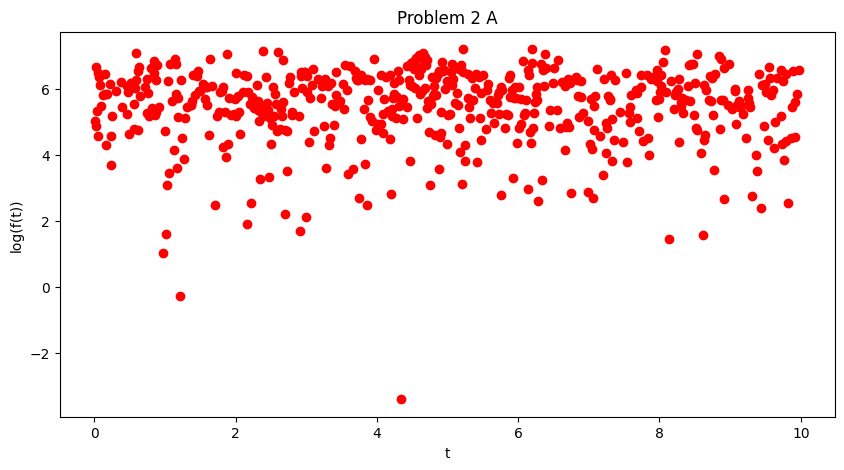

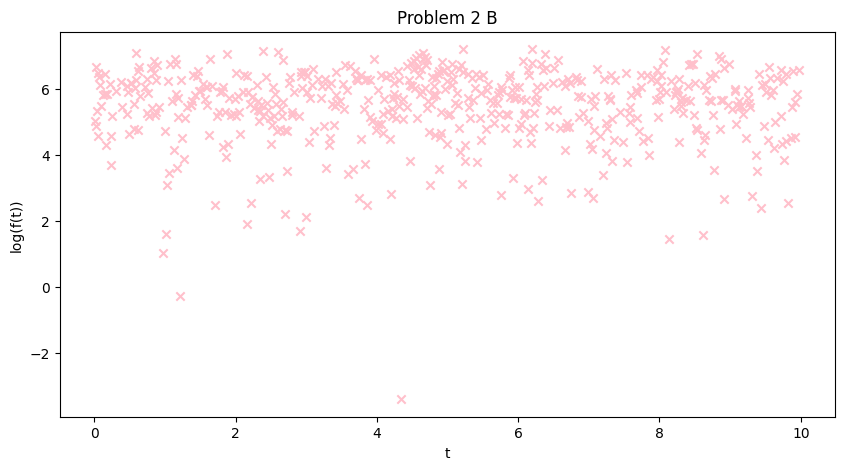

In [ ]:
log_ft = np.log(ft)
plt.figure(figsize=(10, 5))
plt.scatter(t, log_ft, color='red', marker='o')
plt.xlabel('t')
plt.ylabel('log(f(t))')
plt.title('Problem 2 A')
plt.show()
plt.figure(figsize=(10, 5))
plt.scatter(t, log_ft, color='pink', marker='x')
plt.xlabel('t')
plt.ylabel('log(f(t))')
plt.title('Problem 2 B')
plt.show()

In [ ]:
#q3: did it

In [ ]:
import io
import numpy as np # Ensure numpy is imported
import pandas as pd # Import pandas for more robust CSV handling

# After uploading 'Dataset_B.csv' to your Colab environment, it will typically be in the /content/ directory.
# You can also drag and drop files directly into the file browser (folder icon on the left).
path2data = '/content'

# File path for the spotify.csv
file_path = path2data + '/spotify.csv'

try:
    # Use pandas to read the CSV file, which can handle mixed data types and headers gracefully.
    df = pd.read_csv(file_path)

    # Assuming you want to work with numerical data from the spotify dataset,
    # you might want to select specific columns. For example, if you want
    # to convert the numerical columns to a numpy array for further processing,
    # you can do so after loading with pandas.
    # For this example, let's say we want all columns except the 'Date' column
    # as a numpy array for general data processing.
    # You might need to adjust column selection based on your specific needs for the spotify data.
    data = df.drop(columns=['Date']).to_numpy() # Convert selected numerical columns to numpy array

    print(f"Successfully loaded data using pandas. Shape of numerical data: {data.shape}")

except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please ensure it's uploaded to /content.")
    raise
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    raise

Successfully loaded data using pandas. Shape of numerical data: (366, 5)


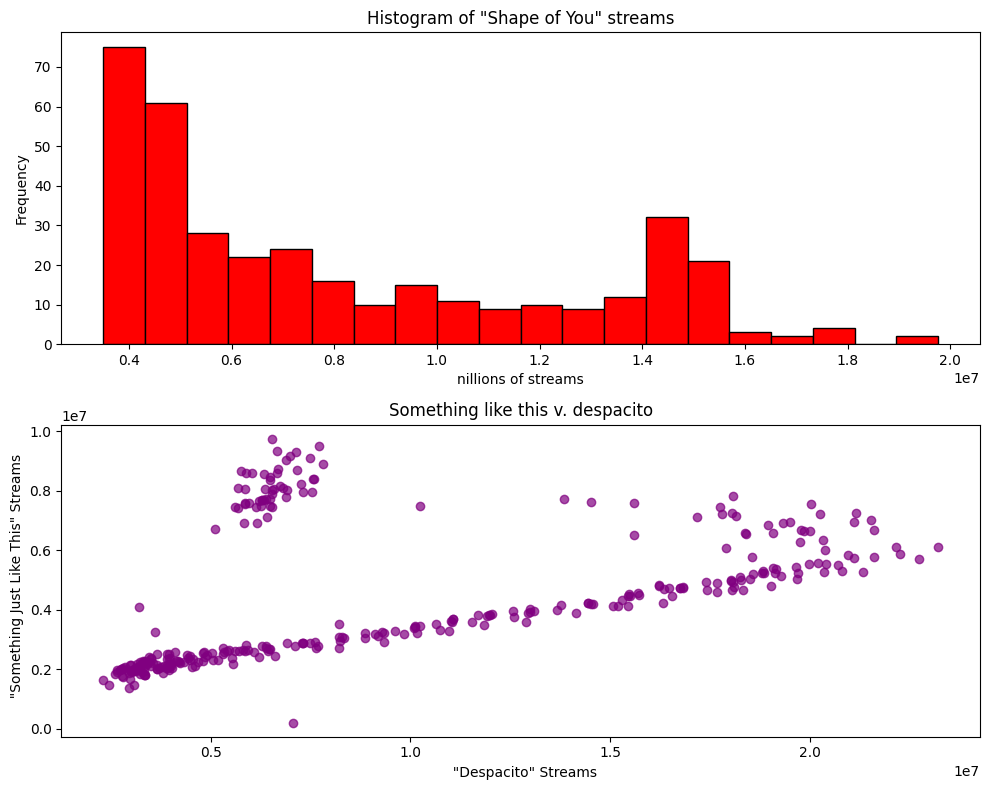

In [ ]:
#q4
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
axes[0].hist(data[:, 0], bins=20, color='red', edgecolor='black')
axes[0].set_title('Histogram of "Shape of You" streams')
axes[0].set_xlabel('nillions of streams')
axes[0].set_ylabel('Frequency')
axes[1].scatter(data[:, 1], data[:, 2], color='purple', alpha=0.7)
axes[1].set_title('Something like this v. despacito')
axes[1].set_xlabel('  "Despacito" Streams')
axes[1].set_ylabel('  "Something Just Like This" Streams')
plt.tight_layout()
plt.show()